In [1]:
import tensorflow as tf 
import numpy as np
import pandas as pd 
import seaborn as sns
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

## Data Processing

In [2]:
data_path = './archive/'

In [3]:
data = pd.read_csv(data_path + 'train.csv')
print(data.shape)
data.head()

(1000, 12)


,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [4]:
all_features = data.columns.to_list()
print(all_features)

['v.id', 'on road old', 'on road now', 'years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']


In [5]:
remove_features = ['v.id', 'on road old', 'on road now']
features = [feature for feature in all_features if feature not in remove_features]
print(features)

['years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']


In [6]:
# sns.pairplot(data[features], diag_kind='kde')

In [7]:
data.corr()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
v.id,1.000000,-0.029926,-0.030787,-0.034255,0.047400,-0.018263,-0.038548,0.047137,0.001613,-0.006997,-0.000632,-0.059460
on road old,-0.029926,1.000000,0.034113,0.007207,0.007488,-0.050717,-0.015682,-0.030097,-0.023816,-0.049266,0.008950,0.233035
on road now,-0.030787,0.034113,1.000000,0.004609,-0.053202,0.028280,-0.005043,-0.015880,0.012699,-0.012719,0.017955,0.282793
years,-0.034255,0.007207,0.004609,1.000000,-0.002089,0.027285,0.053579,0.050220,0.025148,-0.003272,0.028859,-0.011854
km,0.047400,0.007488,-0.053202,-0.002089,1.000000,-0.039930,-0.013640,0.032680,0.026450,-0.052918,0.013566,-0.935924
rating,-0.018263,-0.050717,0.028280,0.027285,-0.039930,1.000000,0.015943,-0.009757,-0.042222,-0.022623,0.004408,0.035038
condition,-0.038548,-0.015682,-0.005043,0.053579,-0.013640,0.015943,1.000000,0.058788,0.018472,-0.071552,0.047805,0.110108
economy,0.047137,-0.030097,-0.015880,0.050220,0.032680,-0.009757,0.058788,1.000000,-0.059402,-0.016782,0.041632,-0.034711
top speed,0.001613,-0.023816,0.012699,0.025148,0.026450,-0.042222,0.018472,-0.059402,1.000000,0.057827,-0.019697,-0.027993
hp,-0.006997,-0.049266,-0.012719,-0.003272,-0.052918,-0.022623,-0.071552,-0.016782,0.057827,1.000000,-0.013817,0.030238


## Convert data to tensor data

In [8]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data, dtype=tf.float32)
print(tensor_data.shape)
print(tensor_data)

(1000, 12)
tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [9]:
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[9.480000e+02 6.112990e+05 8.290390e+05 6.000000e+00 6.016000e+04
  3.000000e+00 1.000000e+00 1.000000e+01 1.610000e+02 8.800000e+01
  9.400000e+01 4.759845e+05]
 [4.900000e+02 5.634650e+05 8.927760e+05 3.000000e+00 7.159800e+04
  5.000000e+00 1.000000e+00 1.200000e+01 1.950000e+02 9.700000e+01
  7.000000e+01 4.434230e+05]
 [1.000000e+03 5.901050e+05 7.797430e+05 5.000000e+00 6.729500e+04
  4.000000e+00 2.000000e+00 8.000000e+00 1.990000e+02 9.900000e+01
  9.600000e+01 4.149385e+05]
 [4.470000e+02 5.445930e+05 8.745320e+05 2.000000e+00 1.094530e+05
  5.000000e+00 4.000000e+00 1.300000e+01 1.590000e+02 9.900000e+01
  1.050000e+02 2.740750e+05]
 [9.140000e+02 6.607140e+05 7.915940e+05 3.000000e+00 1.347690e+05
  3.000000e+00 1.000000e+00 1.100000e+01 1.450000e+02 1.010000e+02
  8.600000e+01 1.873050e+05]], shape=(5, 12), dtype=float32)


In [10]:
x = tensor_data[:, 3:-1]
print(x.shape)
print(x[:5])

(1000, 8)
tf.Tensor(
[[6.00000e+00 6.01600e+04 3.00000e+00 1.00000e+00 1.00000e+01 1.61000e+02
  8.80000e+01 9.40000e+01]
 [3.00000e+00 7.15980e+04 5.00000e+00 1.00000e+00 1.20000e+01 1.95000e+02
  9.70000e+01 7.00000e+01]
 [5.00000e+00 6.72950e+04 4.00000e+00 2.00000e+00 8.00000e+00 1.99000e+02
  9.90000e+01 9.60000e+01]
 [2.00000e+00 1.09453e+05 5.00000e+00 4.00000e+00 1.30000e+01 1.59000e+02
  9.90000e+01 1.05000e+02]
 [3.00000e+00 1.34769e+05 3.00000e+00 1.00000e+00 1.10000e+01 1.45000e+02
  1.01000e+02 8.60000e+01]], shape=(5, 8), dtype=float32)


In [11]:
y = tensor_data[:, -1]
y = tf.expand_dims(y, axis=1)
print(y.shape)
print(y[:5])

(1000, 1)
tf.Tensor(
[[475984.5]
 [443423. ]
 [414938.5]
 [274075. ]
 [187305. ]], shape=(5, 1), dtype=float32)


## Normalization
$$
\text{normalization} = \frac{X - \mu}{\sigma}, \quad \text{where $\mu$ = mean and $\sigma$ = std}
$$
```
Normalization()
```
Default axis = -1 means mean and std will be calculated based on columns, and then normalization will be performed along the columns.

In [12]:
TRAINING_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(x)

In [13]:
x_train = x[:int(DATASET_SIZE*TRAINING_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAINING_RATIO)]
print(x_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


In [52]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [14]:
x_val = x[int(DATASET_SIZE*TRAINING_RATIO):int(DATASET_SIZE*(TRAINING_RATIO+VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAINING_RATIO):int(DATASET_SIZE*(TRAINING_RATIO+VAL_RATIO))]
print(x_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


In [53]:
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [15]:
x_test = x[int(DATASET_SIZE*(TRAINING_RATIO+VAL_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAINING_RATIO+VAL_RATIO)):]
print(x_test.shape)
print(y_test.shape)

(100, 8)
(100, 1)


In [54]:
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [16]:
normalizer = Normalization()
normalizer.adapt(x_train)
normalizer(x)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[ 0.8210282 , -1.3732774 ,  0.00716643, -1.6118985 , -0.7346294 ,
        -0.30038092,  0.16218606, -0.44193545],
       [-0.91966766, -0.9778645 ,  1.4403521 , -1.6118985 ,  0.1667563 ,
         1.437628  ,  0.6028415 , -1.5890461 ],
       [ 0.24079622, -1.1266197 ,  0.72375923, -1.260531  , -1.636015  ,
         1.6420997 ,  0.7007649 , -0.3463429 ],
       [-1.4998996 ,  0.3307871 ,  1.4403521 , -0.55779576,  0.61744916,
        -0.40261674,  0.7007649 ,  0.08382363],
       [-0.91966766,  1.2059641 ,  0.00716643, -1.6118985 , -0.28393653,
        -1.1182675 ,  0.79868835, -0.82430565]], dtype=float32)>

In [17]:
print(x[:5])

tf.Tensor(
[[6.00000e+00 6.01600e+04 3.00000e+00 1.00000e+00 1.00000e+01 1.61000e+02
  8.80000e+01 9.40000e+01]
 [3.00000e+00 7.15980e+04 5.00000e+00 1.00000e+00 1.20000e+01 1.95000e+02
  9.70000e+01 7.00000e+01]
 [5.00000e+00 6.72950e+04 4.00000e+00 2.00000e+00 8.00000e+00 1.99000e+02
  9.90000e+01 9.60000e+01]
 [2.00000e+00 1.09453e+05 5.00000e+00 4.00000e+00 1.30000e+01 1.59000e+02
  9.90000e+01 1.05000e+02]
 [3.00000e+00 1.34769e+05 3.00000e+00 1.00000e+00 1.10000e+01 1.45000e+02
  1.01000e+02 8.60000e+01]], shape=(5, 8), dtype=float32)


In [60]:
model = tf.keras.Sequential([
    InputLayer(input_shape=(8,)),
    normalizer,
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)  # as we need only one output for current_price.
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 8)                 17        
 on)                                                             
                                                                 
 dense_5 (Dense)             (None, 128)               1152      
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 


Total params: 34322 (134.07 KB)
Trainable params: 34305 (134.00 KB)
Non-trainable params: 17 (72.00 Byte)
_________________________________________________________________


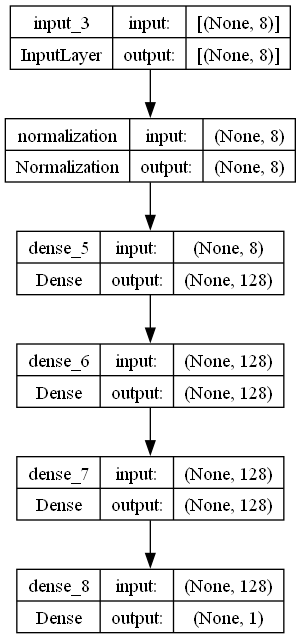

In [61]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

## Training and Optimization

In [62]:
model.compile(
    optimizer=Adam(learning_rate=0.1),
    loss=MeanAbsoluteError(),
    metrics = RootMeanSquaredError()
)

In [63]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=100, verbose=1)

Epoch 1/100


25/25 [==============================] - 2s 15ms/step - loss: 150740.7344 - root_mean_squared_error: 199647.2969 - val_loss: 51037.4648 - val_root_mean_squared_error: 62917.0039
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 53033.4688 - root_mean_squared_error: 65654.2578 - val_loss: 49712.4258 - val_root_mean_squared_error: 62906.9219
Epoch 3/100
25/25 [==============================] - 0s 7ms/step - loss: 43002.8789 - root_mean_squared_error: 54269.9180 - val_loss: 41193.2031 - val_root_mean_squared_error: 51467.2461
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 43052.0000 - root_mean_squared_error: 54254.4844 - val_loss: 46964.4492 - val_root_mean_squared_error: 59481.0391
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 42196.8750 - root_mean_squared_error: 53606.9648 - val_loss: 41491.9062 - val_root_mean_squared_error: 52158.5547
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 4

In [64]:
print(history.history.keys())

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])


In [65]:
loss = history.history['loss']
val_loss = history.history['val_loss']
root_mean_squared_error = history.history['root_mean_squared_error']
val_root_mean_squared_error = history.history['val_root_mean_squared_error']
print(loss)
print(val_loss)
print(root_mean_squared_error)
print(val_root_mean_squared_error)

[150740.734375, 53033.46875, 43002.87890625, 43052.0, 42196.875, 41785.82421875, 41965.19140625, 42608.66015625, 38480.1328125, 41931.921875, 40213.59375, 39305.33984375, 40963.3515625, 38989.74609375, 39925.19921875, 42566.82421875, 37477.90625, 37624.9609375, 37862.4921875, 41634.203125, 39346.37890625, 35377.09375, 36506.4375, 35934.7421875, 44078.0703125, 36069.671875, 38299.69921875, 36150.63671875, 46752.5703125, 36148.34765625, 39768.55859375, 36560.62109375, 35962.77734375, 37365.48828125, 35617.73046875, 36138.015625, 41150.9765625, 35644.984375, 38893.63671875, 36165.0859375, 35622.546875, 36151.5859375, 34669.40625, 37906.01953125, 33865.01171875, 34118.5234375, 34732.28125, 35167.2421875, 35809.70703125, 36272.15625, 36450.609375, 36186.953125, 34820.90234375, 34669.12890625, 34519.63671875, 37504.12890625, 33069.94921875, 35582.99609375, 35007.390625, 33939.54296875, 34633.50390625, 33938.859375, 32976.16015625, 32435.181640625, 36049.0234375, 33755.6015625, 33646.20703125

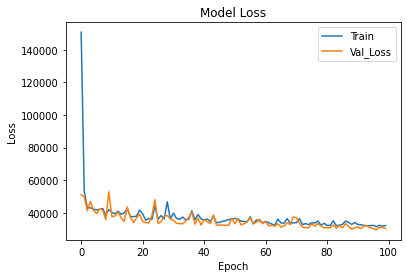

In [66]:
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val_Loss'])
plt.show()

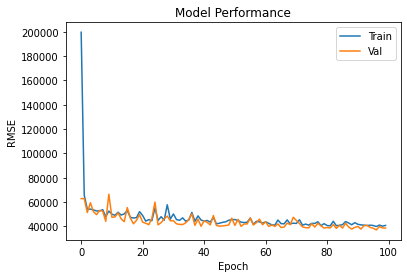

In [67]:
plt.plot(root_mean_squared_error)
plt.plot(val_root_mean_squared_error)
plt.title('Model Performance')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend(['Train', 'Val'])
plt.show()

In [68]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 1s 4ms/step - loss: 42520.3789 - root_mean_squared_error: 49479.8281


[42520.37890625, 49479.828125]

## Validation and Testing

In [69]:
print(x_test[0])

tf.Tensor(
[6.00000e+00 1.36584e+05 1.00000e+00 8.00000e+00 1.10000e+01 1.82000e+02
 1.08000e+02 7.90000e+01], shape=(8,), dtype=float32)


In [70]:
model.predict(tf.expand_dims(x_test[0], axis=0))

1/1 [==============================] - 0s 102ms/step


array([[172542.28]], dtype=float32)

In [71]:
y_test[0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([157507.], dtype=float32)>

In [72]:
y_true = list(y_test[:, 0].numpy())
print(y_true)

[157507.0, 493806.5, 82848.0, 285001.5, 370175.0, 324899.5, 490779.5, 206836.5, 224958.5, 96554.0, 137514.0, 206999.5, 456554.5, 369149.0, 217446.0, 175102.5, 218983.5, 234142.5, 150074.0, 237954.0, 286937.5, 377507.0, 333278.0, 332478.5, 501920.5, 221412.5, 476955.5, 309449.0, 390756.5, 307993.0, 330908.5, 178991.5, 97526.0, 375118.0, 408860.5, 461900.5, 276430.0, 160597.5, 415103.0, 499185.5, 306745.5, 197320.0, 315866.5, 184571.0, 126791.5, 493994.0, 140061.5, 206591.0, 377706.5, 500679.5, 342427.0, 174352.5, 312469.0, 317681.5, 103742.5, 473834.0, 441395.5, 53040.0, 203811.5, 133006.5, 172462.0, 441865.0, 373529.0, 169674.5, 333672.0, 146527.0, 122567.5, 296829.0, 219127.0, 538075.5, 172234.5, 283208.0, 410403.5, 390915.5, 226087.5, 500164.0, 496671.0, 399055.5, 381960.0, 295553.5, 149141.5, 239400.0, 224359.5, 441863.5, 53470.5, 322204.0, 404800.5, 167794.0, 109828.5, 481862.0, 318951.0, 503606.5, 426479.5, 512885.5, 213768.5, 343416.5, 208468.0, 302929.5, 498148.0, 329639.0]


In [73]:
y_prid = list(model.predict(x_test)[:, 0])
print(y_prid)

4/4 [==============================] - 0s 3ms/step
[172542.28, 418628.75, 137469.97, 249961.4, 481892.38, 315338.25, 490649.06, 220224.98, 216856.4, 114910.945, 195947.44, 164203.14, 397584.22, 301821.22, 309154.9, 108967.234, 172039.61, 317190.6, 131644.69, 195316.17, 212072.84, 440967.25, 300134.25, 338924.97, 557118.44, 296080.6, 420636.56, 253642.25, 446529.12, 365478.94, 384166.6, 183842.11, 151169.8, 420878.5, 455622.47, 493723.62, 264432.62, 109966.555, 473089.6, 456682.34, 358251.3, 192593.83, 340402.84, 280218.72, 194929.48, 460903.56, 177876.88, 220709.6, 423253.75, 488369.44, 315652.6, 94709.164, 320409.12, 344589.4, 151005.16, 472556.1, 499703.22, 117147.6, 222219.0, 120332.18, 131098.48, 392160.84, 380650.94, 241695.67, 383724.34, 149555.97, 83684.02, 329901.25, 149532.23, 522350.2, 145578.19, 225120.67, 338731.3, 440925.88, 194188.55, 475670.25, 480519.47, 352770.06, 449788.84, 276956.28, 189512.75, 286967.53, 227607.5, 482382.22, 137066.2, 281450.22, 445196.62, 79286.0, 

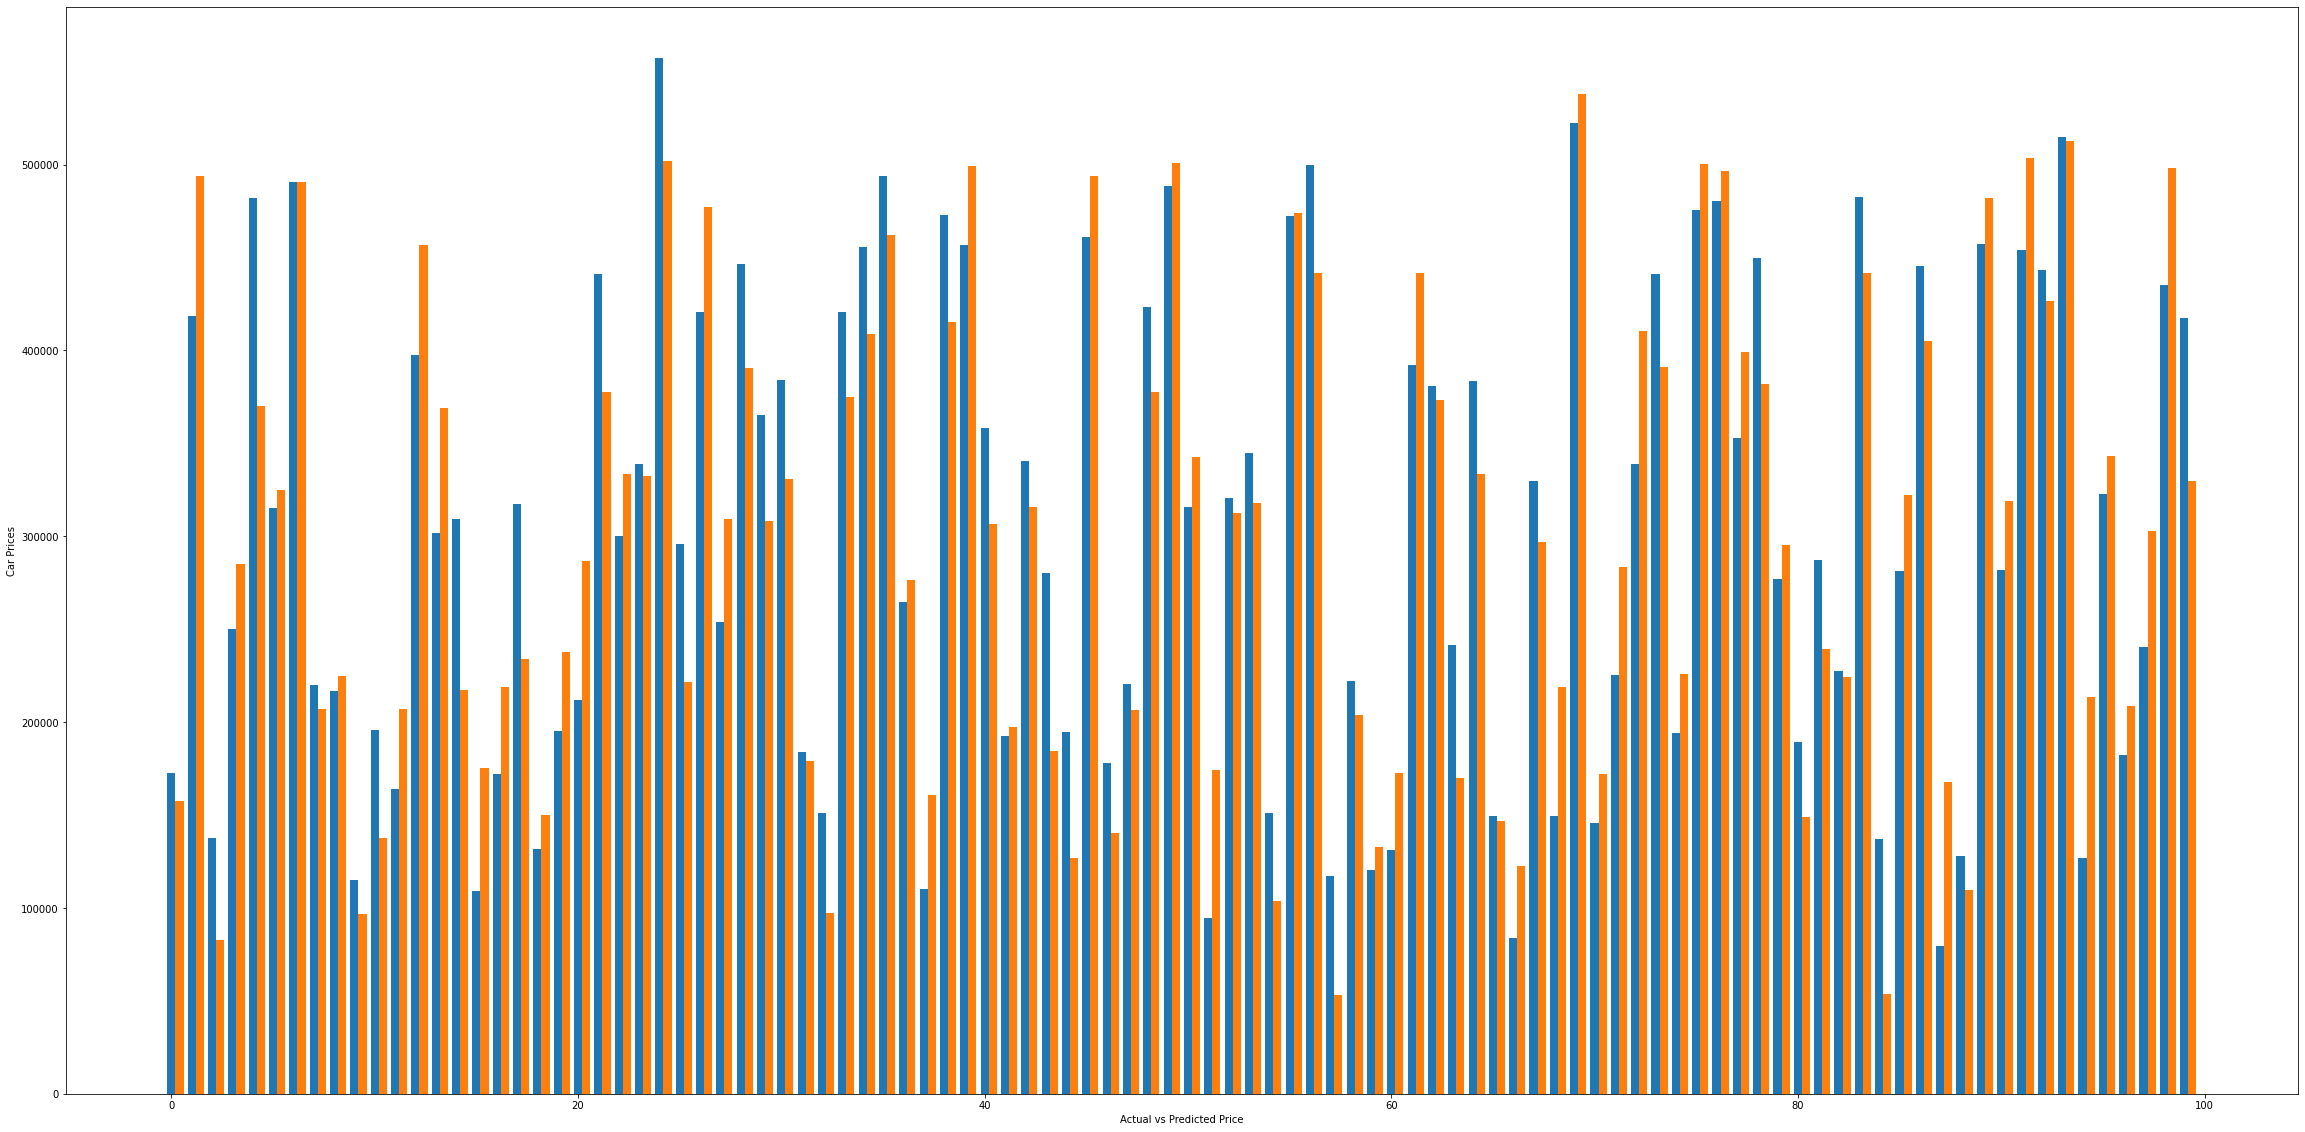

In [74]:
ind = np.arange(100)
plt.figure(figsize=(40, 20))

width = 0.4

plt.bar(ind, y_prid, width, label='Predict Car Price')
plt.bar(ind+width, y_true, width, label='Actual Car Price')

plt.xlabel('Actual vs Predicted Price')
plt.ylabel('Car Prices')

plt.show()